## Importing The Libaries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
import re

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [42]:
pd.set_option('display.max_columns',None)

## Loading the Dataset

In [43]:
df = pd.read_csv('./data/test.csv')
df.head()

,comments,sentiments,language
0,"""यह वीडियो समय की बर्बादी है, मैंने कुछ नहीं स...",-1.0,hindi
1,"""This video is a waste of time, I learned noth...",-1.0,en
2,"""The presenter's voice is so annoying, I could...",-1.0,en
3,"""Terrible explanation, I'm more confused now t...",-1.0,en
4,"""I can't believe people actually find this use...",-1.0,en


## Data analysis and Data Cleaning

In [44]:
df.shape

(64, 3)

### Handling Null Rows

In [45]:
df.isnull().sum()

comments      4
sentiments    4
language      4
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

comments      0
sentiments    0
language      0
dtype: int64

In [48]:
df.shape

(60, 3)

In [49]:
df.nunique()

comments      60
sentiments     3
language       5
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 63
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comments    60 non-null     object 
 1   sentiments  60 non-null     float64
 2   language    60 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [51]:
df = df.reset_index().drop('index',axis=1)

In [52]:
df.head()

,comments,sentiments,language
0,"""यह वीडियो समय की बर्बादी है, मैंने कुछ नहीं स...",-1.0,hindi
1,"""This video is a waste of time, I learned noth...",-1.0,en
2,"""The presenter's voice is so annoying, I could...",-1.0,en
3,"""Terrible explanation, I'm more confused now t...",-1.0,en
4,"""I can't believe people actually find this use...",-1.0,en


### Detecting Language

In [53]:
df["comments"][1]

'"This video is a waste of time, I learned nothing."'

In [54]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

print(detect_language("यह वीडियो समय की बर्बादी है, मैंने कुछ नहीं सीखा"))
print(detect_language("The presenter\'s voice is so annoying, I couldn\'t concentrate."))

hi
en


In [55]:
df['detected_language'] = df['comments'].apply(detect_language)

# Filter rows where language is English
english_df = df[df['detected_language'] == 'en']
english_df.head()

,comments,sentiments,language,detected_language
1,"""This video is a waste of time, I learned noth...",-1.0,en,en
2,"""The presenter's voice is so annoying, I could...",-1.0,en,en
3,"""Terrible explanation, I'm more confused now t...",-1.0,en,en
4,"""I can't believe people actually find this use...",-1.0,en,en
6,"""You call this education? It's more like tortu...",-1.0,en,en


In [56]:
english_df.shape

(50, 4)

In [57]:
def print_random_rows(df):
    random_comments = df['comments'].sample(n=5, random_state=13)

    for comment in random_comments:
        print(comment)
print_random_rows(english_df)

how download pdf and save it in my app?
"You call this education? It's more like torture. 😒"
I wish I found this channel sooner! Your videos make learning fun and engaging. 
Can we create react native app without using Android studio.. if i'm using my physical phone for preview
"This video is a waste of time, I learned nothing."


### Converting emoji's to text

In [58]:
import emoji

In [59]:
def convert_emojis_to_text(text):
    return emoji.demojize(text)

english_df['comments'] = english_df['comments'].apply(convert_emojis_to_text)

print_random_rows(english_df)

how download pdf and save it in my app?
"You call this education? It's more like torture. :unamused_face:"
I wish I found this channel sooner! Your videos make learning fun and engaging. 
Can we create react native app without using Android studio.. if i'm using my physical phone for preview
"This video is a waste of time, I learned nothing."


### Converting emoticon to text

In [60]:
EMOTICONS = {
    u":‑\)": "Happy face smiley",
    u":\)": "Happy face smiley",
    u":-\]": "Happy face smiley",
    u":\]": "Happy face smiley",
    u":-3": "Happy face smiley",
    u":3": "Happy face smiley",
    u":->": "Happy face smiley",
    u":>": "Happy face smiley",
    u"8-\)": "Happy face smiley",
    u":o\)": "Happy face smiley",
    u":-\}": "Happy face smiley",
    u":\}": "Happy face smiley",
    u":-\)": "Happy face smiley",
    u":c\)": "Happy face smiley",
    u":\^\)": "Happy face smiley",
    u"=\]": "Happy face smiley",
    u"=\)": "Happy face smiley",
    u":‑D": "Laughing, big grin or laugh with glasses",
    u":D": "Laughing, big grin or laugh with glasses",
    u"8‑D": "Laughing, big grin or laugh with glasses",
    u"8D": "Laughing, big grin or laugh with glasses",
    u"X‑D": "Laughing, big grin or laugh with glasses",
    u"XD": "Laughing, big grin or laugh with glasses",
    u"=D": "Laughing, big grin or laugh with glasses",
    u"=3": "Laughing, big grin or laugh with glasses",
    u"B\^D": "Laughing, big grin or laugh with glasses",
    u":-\)\)": "Very happy",
    u":‑\(": "Frown, sad, andry or pouting",
    u":-\(": "Frown, sad, andry or pouting",
    u":\(": "Frown, sad, andry or pouting",
    u":‑c": "Frown, sad, andry or pouting",
    u":c": "Frown, sad, andry or pouting",
    u":‑<": "Frown, sad, andry or pouting",
    u":<": "Frown, sad, andry or pouting",
    u":‑\[": "Frown, sad, andry or pouting",
    u":\[": "Frown, sad, andry or pouting",
    u":-\|\|": "Frown, sad, andry or pouting",
    u">:\[": "Frown, sad, andry or pouting",
    u":\{": "Frown, sad, andry or pouting",
    u":@": "Frown, sad, andry or pouting",
    u">:\(": "Frown, sad, andry or pouting",
    u":'‑\(": "Crying",
    u":'\(": "Crying",
    u":'‑\)": "Tears of happiness",
    u":'\)": "Tears of happiness",
    u"D‑':": "Horror",
    u"D:<": "Disgust",
    u"D:": "Sadness",
    u"D8": "Great dismay",
    u"D;": "Great dismay",
    u"D=": "Great dismay",
    u"DX": "Great dismay",
    u":‑O": "Surprise",
    u":O": "Surprise",
    u":‑o": "Surprise",
    u":o": "Surprise",
    u":-0": "Shock",
    u"8‑0": "Yawn",
    u">:O": "Yawn",
    u":-\*": "Kiss",
    u":\*": "Kiss",
    u":X": "Kiss",
    u";‑\)": "Wink or smirk",
    u";\)": "Wink or smirk",
    u"\*-\)": "Wink or smirk",
    u"\*\)": "Wink or smirk",
    u";‑\]": "Wink or smirk",
    u";\]": "Wink or smirk",
    u";\^\)": "Wink or smirk",
    u":‑,": "Wink or smirk",
    u";D": "Wink or smirk",
    u":‑P": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S": "Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|": "Straight face",
    u":\|": "Straight face",
    u":$": "Embarrassed or blushing",
    u":‑x": "Sealed lips or wearing braces or tongue-tied",
    u":x": "Sealed lips or wearing braces or tongue-tied",
    u":‑#": "Sealed lips or wearing braces or tongue-tied",
    u":#": "Sealed lips or wearing braces or tongue-tied",
    u":‑&": "Sealed lips or wearing braces or tongue-tied",
    u":&": "Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)": "Angel, saint or innocent",
    u"O:\)": "Angel, saint or innocent",
    u"0:‑3": "Angel, saint or innocent",
    u"0:3": "Angel, saint or innocent",
    u"0:‑\)": "Angel, saint or innocent",
    u"0:\)": "Angel, saint or innocent",
    u":‑b": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)": "Angel, saint or innocent",
    u">:‑\)": "Evil or devilish",
    u">:\)": "Evil or devilish",
    u"\}:‑\)": "Evil or devilish",
    u"\}:\)": "Evil or devilish",
    u"3:‑\)": "Evil or devilish",
    u"3:\)": "Evil or devilish",
    u">;\)": "Evil or devilish",
    u"\|;‑\)": "Cool",
    u"\|‑O": "Bored",
    u":‑J": "Tongue-in-cheek",
    u"#‑\)": "Party all night",
    u"%‑\)": "Drunk or confused",
    u"%\)": "Drunk or confused",
    u":-###..": "Being sick",
    u":###..": "Being sick",
    u"<:‑\|": "Dump",
    u"\(>_<\)": "Troubled",
    u"\(>_<\)>": "Troubled",
    u"\(';'\)": "Baby",
    u"\(\^\^>``": "Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)": "Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)": "Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)": "Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz": "Sleeping",
    u"\(\^_-\)": "Wink",
    u"\(\(\+_\+\)\)": "Confused",
    u"\(\+o\+\)": "Confused",
    u"\(o\|o\)": "Ultraman",
    u"\^_\^": "Joyful",
    u"\(\^_\^\)/": "Joyful",
    u"\(\^O\^\)／": "Joyful",
    u"\(\^o\^\)／": "Joyful",
    u"\(__\)": "Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_": "Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>": "Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>": "Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m": "Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m": "Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)": "Sad or Crying",
    u"\(/_;\)": "Sad or Crying",
    u"\(T_T\) \(;_;\)": "Sad or Crying",
    u"\(;_;": "Sad of Crying",
    u"\(;_:\)": "Sad or Crying",
    u"\(;O;\)": "Sad or Crying",
    u"\(:_;\)": "Sad or Crying",
    u"\(ToT\)": "Sad or Crying",
    u";_;": "Sad or Crying",
    u";-;": "Sad or Crying",
    u";n;": "Sad or Crying",
    u";;": "Sad or Crying",
    u"Q\.Q": "Sad or Crying",
    u"T\.T": "Sad or Crying",
    u"QQ": "Sad or Crying",
    u"Q_Q": "Sad or Crying",
    u"\(-\.-\)": "Shame",
    u"\(-_-\)": "Shame",
    u"\(一一\)": "Shame",
    u"\(；一_一\)": "Shame",
    u"\(=_=\)": "Tired",
    u"\(=\^\·\^=\)": "cat",
    u"\(=\^\·\·\^=\)": "cat",
    u"=_\^=	": "cat",
    u"\(\.\.\)": "Looking down",
    u"\(\._\.\)": "Looking down",
    u"\^m\^": "Giggling with hand covering mouth",
    u"\(\・\・?": "Confusion",
    u"\(?_?\)": "Confusion",
    u">\^_\^<": "Normal Laugh",
    u"<\^!\^>": "Normal Laugh",
    u"\^/\^": "Normal Laugh",
    u"\（\*\^_\^\*）": "Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)": "Normal Laugh",
    u"\(^\^\)": "Normal Laugh",
    u"\(\^\.\^\)": "Normal Laugh",
    u"\(\^_\^\.\)": "Normal Laugh",
    u"\(\^_\^\)": "Normal Laugh",
    u"\(\^\^\)": "Normal Laugh",
    u"\(\^J\^\)": "Normal Laugh",
    u"\(\*\^\.\^\*\)": "Normal Laugh",
    u"\(\^—\^\）": "Normal Laugh",
    u"\(#\^\.\^#\)": "Normal Laugh",
    u"\（\^—\^\）": "Waving",
    u"\(;_;\)/~~~": "Waving",
    u"\(\^\.\^\)/~~~": "Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~": "Waving",
    u"\(T_T\)/~~~": "Waving",
    u"\(ToT\)/~~~": "Waving",
    u"\(\*\^0\^\*\)": "Excited",
    u"\(\*_\*\)": "Amazed",
    u"\(\*_\*;": "Amazed",
    u"\(\+_\+\) \(@_@\)": "Amazed",
    u"\(\*\^\^\)v": "Laughing,Cheerful",
    u"\(\^_\^\)v": "Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)": "Headphones,Listening to music",
    u'\(-"-\)': "Worried",
    u"\(ーー;\)": "Worried",
    u"\(\^0_0\^\)": "Eyeglasses",
    u"\(\＾ｖ\＾\)": "Happy",
    u"\(\＾ｕ\＾\)": "Happy",
    u"\(\^\)o\(\^\)": "Happy",
    u"\(\^O\^\)": "Happy",
    u"\(\^o\^\)": "Happy",
    u"\)\^o\^\(": "Happy",
    u":O o_O": "Surprised",
    u"o_0": "Surprised",
    u"o\.O": "Surpised",
    u"\(o\.o\)": "Surprised",
    u"oO": "Surprised",
    u"\(\*￣m￣\)": "Dissatisfied",
    u"\(‘A`\)": "Snubbed or Deflated"
}

In [61]:
def convert_emoticons_to_text(text):
    for emoticon, text_rep in EMOTICONS.items():
        text = re.sub(emoticon, text_rep, text)
    return text

english_df['comments'] = english_df['comments'].apply(convert_emoticons_to_text)
print_random_rows(english_df)

how download pdf and save it in my app?
"You call this education? It's more like torture. :unamused_face:"
I wish I found this channel sooner! Your videos make learning fun and engaging. 
Can we create react native app without using Android studio.. if i'm using my physical phone for preview
"This video is a waste of time, I learned nothing."


### Removing Punctuations, Numbers and Special Characters.

In [62]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z\s]'  # Matches any character that is not a letter or whitespace
    return re.sub(pattern, '', text)

english_df['comments'] = english_df['comments'].apply(remove_special_characters)
print_random_rows(english_df)

how download pdf and save it in my app
You call this education Its more like torture unamusedface
I wish I found this channel sooner Your videos make learning fun and engaging 
Can we create react native app without using Android studio if im using my physical phone for preview
This video is a waste of time I learned nothing


### Changing the text to lower case.

In [63]:
english_df['comments'] = english_df['comments'].apply(lambda x:x.lower())
print_random_rows(english_df)

how download pdf and save it in my app
you call this education its more like torture unamusedface
i wish i found this channel sooner your videos make learning fun and engaging 
can we create react native app without using android studio if im using my physical phone for preview
this video is a waste of time i learned nothing


### Tokenization

In [64]:
tokenized_tweet = english_df['comments'].apply(lambda x: x.split())
tokenized_tweet.head()

1    [this, video, is, a, waste, of, time, i, learn...
2    [the, presenters, voice, is, so, annoying, i, ...
3    [terrible, explanation, im, more, confused, no...
4    [i, cant, believe, people, actually, find, thi...
6    [you, call, this, education, its, more, like, ...
Name: comments, dtype: object

## Lemmatization

In [65]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [66]:
# !nltk.download('stopwords')

In [67]:
wnl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [68]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in stop_words])

tokenized_tweet.head()

1               [video, waste, time, learned, nothing]
2    [presenter, voice, annoying, couldnt, concentr...
3      [terrible, explanation, im, confused, watching]
4    [cant, believe, people, actually, find, useful...
6       [call, education, like, torture, unamusedface]
Name: comments, dtype: object

In [69]:
tokenized_tweet.reset_index(drop=True, inplace=True)
tokenized_tweet[:10]

0               [video, waste, time, learned, nothing]
1    [presenter, voice, annoying, couldnt, concentr...
2      [terrible, explanation, im, confused, watching]
3    [cant, believe, people, actually, find, useful...
4       [call, education, like, torture, unamusedface]
5        [ive, seen, better, explanation, preschooler]
6    [id, rather, slam, head, wall, watch, manfacep...
7     [unsubscribed, cant, stand, lowquality, content]
8                  [presenter, need, go, back, school]
9    [im, surprised, channel, subscriber, content, ...
Name: comments, dtype: object

In [70]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [71]:
english_df['comments'] = tokenized_tweet

In [72]:
english_df['comments'].head()

1         presenter voice annoying couldnt concentrate
2            terrible explanation im confused watching
3    cant believe people actually find useful commo...
4             call education like torture unamusedface
6        id rather slam head wall watch manfacepalming
Name: comments, dtype: object

## Let's do the Sentiment Analysis on the Comments Dataset

### Using NLTK

In [73]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [75]:
# US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])
english_df['comments'] = english_df['comments'].astype(str)
english_df['predicted_sentiment'] = english_df['comments'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [76]:
english_df.head()

,comments,sentiments,language,detected_language,predicted_sentiment
1,presenter voice annoying couldnt concentrate,-1.0,en,en,-0.4019
2,terrible explanation im confused watching,-1.0,en,en,-0.6597
3,cant believe people actually find useful commo...,-1.0,en,en,0.4404
4,call education like torture unamusedface,-1.0,en,en,-0.3400
6,id rather slam head wall watch manfacepalming,-1.0,en,en,-0.3818


## Classifying the Sentiment scores as Positive, Negative and Neutral

In [77]:
english_df['predicted_sentiment'] = english_df['predicted_sentiment'].apply(lambda s : '1' if s > 0 else ('0' if s == 0 else '-1'))

In [78]:
english_df.head()

,comments,sentiments,language,detected_language,predicted_sentiment
1,presenter voice annoying couldnt concentrate,-1.0,en,en,-1
2,terrible explanation im confused watching,-1.0,en,en,-1
3,cant believe people actually find useful commo...,-1.0,en,en,1
4,call education like torture unamusedface,-1.0,en,en,-1
6,id rather slam head wall watch manfacepalming,-1.0,en,en,-1


In [79]:
english_df.predicted_sentiment.value_counts()

predicted_sentiment
1     24
0     22
-1     4
Name: count, dtype: int64

In [80]:
english_df['predicted_sentiment'] = english_df['predicted_sentiment'].astype(float)
accuracy = round((english_df['predicted_sentiment'] == english_df['sentiments']).mean(), 2)

print("\nOverall Accuracy:", accuracy*100)


Overall Accuracy: 54.0


## Wordcloud of all the comments to see the most frequent comments.

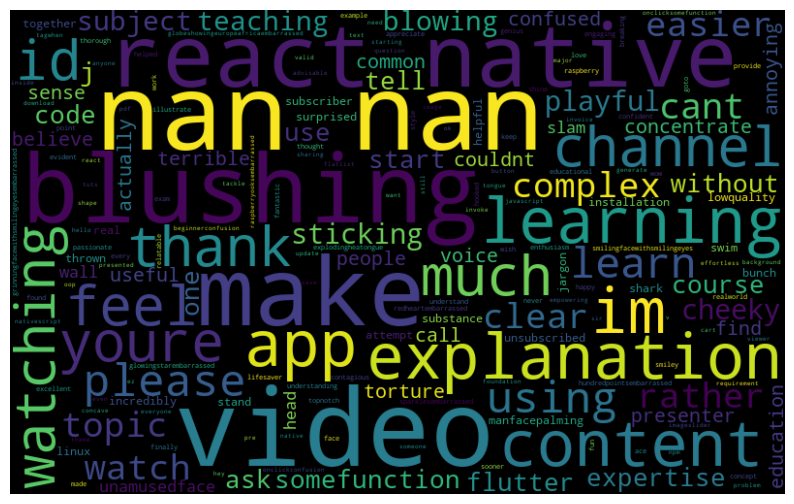

In [81]:
all_words = ' '.join([text for text in english_df['comments']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Wordcloud of Positive Comments

In [82]:
all_words_posi = ' '.join([text for text in english_df['comments'][english_df.predicted_sentiment == 1]])

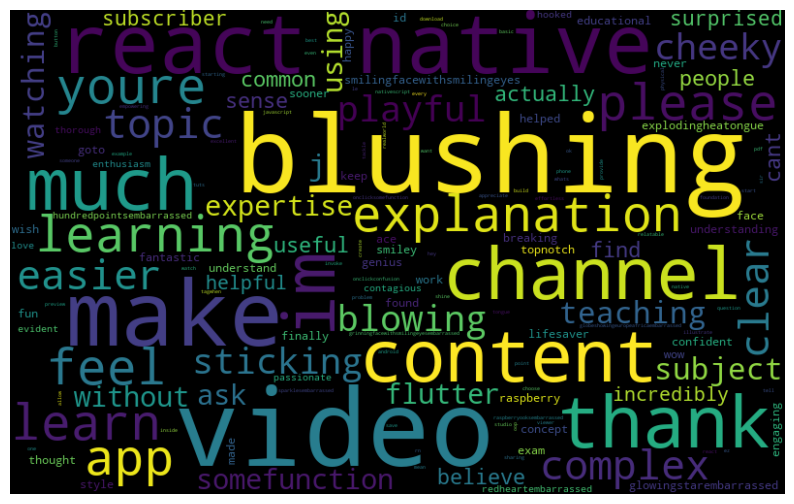

In [83]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

### Wordcloud of Negative Comments

In [84]:
all_words_nega = ' '.join([text for text in english_df['comments'][english_df.predicted_sentiment == -1]])

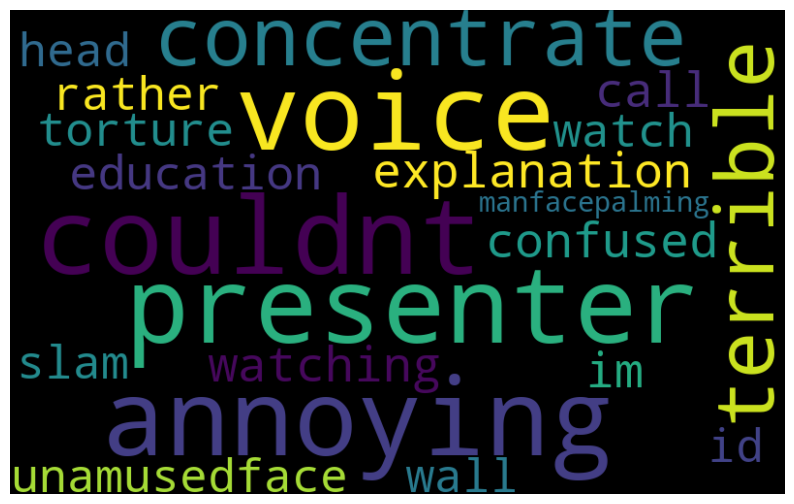

In [85]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

### Wordcloud of Neutral Comments

In [86]:
all_words_neu = ' '.join([text for text in english_df['comments'][english_df.predicted_sentiment == 0]])

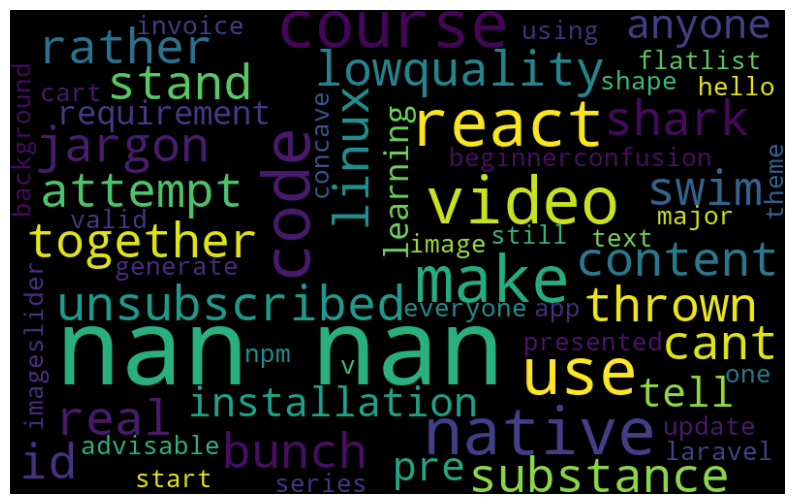

In [87]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()

# Using Pretrained Hugging Face Models

In [88]:
from transformers import pipeline

In [89]:
df = pd.read_csv('./data/test.csv')

df.dropna(inplace=True)
english_df = df[df['language'] == 'en'] # Filter rows where language is English
print("Shape: ", english_df.shape)
english_df.head()

Shape:  (46, 3)


,comments,sentiments,language
1,"""This video is a waste of time, I learned noth...",-1.0,en
2,"""The presenter's voice is so annoying, I could...",-1.0,en
3,"""Terrible explanation, I'm more confused now t...",-1.0,en
4,"""I can't believe people actually find this use...",-1.0,en
6,"""You call this education? It's more like tortu...",-1.0,en


### Model-1

In [91]:
sentiment_pipeline = pipeline("sentiment-analysis")
# sentiment_pipeline(data)

comments = english_df['comments'].tolist()
result = sentiment_pipeline(comments)

sentiment_mapping = {'NEGATIVE': -1, 'POSITIVE': 1}
english_df['predicted_sentiment_1'] = [sentiment_mapping.get(item['label'], -1) for item in result]
english_df.head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


,comments,sentiments,language,predicted_sentiment_1
1,"""This video is a waste of time, I learned noth...",-1.0,en,-1
2,"""The presenter's voice is so annoying, I could...",-1.0,en,-1
3,"""Terrible explanation, I'm more confused now t...",-1.0,en,-1
4,"""I can't believe people actually find this use...",-1.0,en,-1
6,"""You call this education? It's more like tortu...",-1.0,en,-1


In [92]:
accuracy = round((english_df['predicted_sentiment_1'] == english_df['sentiments']).mean(), 2)
print("\nOverall Accuracy:", accuracy*100)


Overall Accuracy: 65.0


### Model-2

In [93]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
comments = english_df['comments'].tolist()
result = specific_model(comments)

sentiment_mapping = {'NEG': -1, 'NEU': 0, 'POS': 1}
english_df['predicted_sentiment_2'] = [sentiment_mapping[item['label']] for item in result]

accuracy = round((english_df['predicted_sentiment_2'] == english_df['sentiments']).mean(), 2)
print("\nOverall Accuracy:", accuracy*100)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.



Overall Accuracy: 96.0


In [94]:
english_df.predicted_sentiment_2.value_counts()

predicted_sentiment_2
 0    17
 1    16
-1    13
Name: count, dtype: int64